In [1]:
import os

filesInDir = os.listdir('.')
filesInDir

['matches_World_Cup.json',
 'matches_Italy.json',
 'all_matches.ipynb',
 '__init__.py',
 'matches_Germany.json',
 'matches_England.json',
 'matches_France.json',
 'matches_Spain.json',
 'matches_European_Championship.json',
 'matches_England.ipynb']

In [2]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#create empty dataframe

allData = []
everyTeam = []
everyPlayer = []
everyReferee = []
everySub = []

# read the json files
for file in filesInDir:
    if file.endswith(".json"):
        with open(file) as json_file:
            data = json.load(json_file)
            allData.extend(data)
            
            print(f"{file}: {len(data)} matches")

            allTeams = []
            formationPlayers = []
            subPlayers = []
            allReferees = []
            for match in data:
                matchTeamsData = match['teamsData']

                for team in matchTeamsData:
                    # print(team)
                    teamGameStats = matchTeamsData[team]
                    teamList = list(teamGameStats.values())
                    teamList.insert(0, f"{match['wyId']}")
                    allTeams.append(teamList)
                    everyTeam.append(teamList)

                    if teamGameStats['hasFormation'] == True:
                        for formationBreak in teamGameStats['formation']:
                            if formationBreak == 'substitutions': 
                                if teamGameStats['formation'][formationBreak] == 'null':
                                    continue

                                else:
                                    for eachSub in teamGameStats['formation'][formationBreak]:
                                        vals = eachSub.values()
                                        valList = list(vals)
                                        valList.insert(0, f"{formationBreak}")
                                        valList.insert(0, f"{match['wyId']}")
                                        if len(valList) < 6:
                                            valList.insert(3, np.nan)
                                        subPlayers.append(valList)
                                        everySub.append(valList)
                                    continue

                            eachFormBreak = teamGameStats['formation'][formationBreak]
                            if eachFormBreak == 'null':
                                continue

                            else:
                                for eachPlayer in eachFormBreak:
                                    vals = eachPlayer.values()
                                    valList = list(vals)
                                    valList.insert(0, f"{formationBreak}")
                                    valList.insert(0, f"{match['wyId']}")
                                    if len(valList) < 8:
                                        valList.insert(3, np.nan)
                                    formationPlayers.append(valList)
                                    everyPlayer.append(valList)

                referees = match['referees']
                refereeList = []
                refereeList.append(int(match['wyId']))
                for referee in referees:       
                    refereeList.append(int(referee['refereeId']))

                if len(refereeList) < 7:
                    refereeList.extend([0] * (7 - len(refereeList)))


                allReferees.append(refereeList)
                everyReferee.append(refereeList)
            # print(allTeams)

            dfPlayer = pd.DataFrame(formationPlayers)
            dfPlayerIndexed = dfPlayer.rename(columns={0: 'matchId', 1: 'formation', 2: 'playerId', 3: 'assists', 4: 'ownGoals', 5: 'redCards', 6: 'goals', 7: 'yellowCards'})
            dfSub = pd.DataFrame(subPlayers)
            dfSubIndexed = dfSub.rename(columns={0: 'matchId', 1: 'formation', 2: 'playerIn', 3: 'assists', 4: 'playerOut', 5: 'minute'})
            dfAllTeams = pd.DataFrame(allTeams)
            dfAllTeams.drop([8], axis=1, inplace=True)
            dfAllTeamsIndexed = dfAllTeams.rename(columns={0: 'matchId', 1: 'scoreET', 2: 'coachId', 3: 'side', 4: 'teamId', 5: 'score', 6: 'scoreP', 7: 'hasFormation', 9: 'scoreHT'})  
            dfAllMatches = pd.DataFrame(data)
            dfAllMatches.drop(['teamsData'], axis=1, inplace=True)
            dfAllMatches.drop(['referees'], axis=1, inplace=True)
            dfAllReferees = pd.DataFrame(allReferees)
            dfAllRefereesIndexed = dfAllReferees.rename(columns={0: 'matchId', 1: 'referee', 2: 'firstAssistant', 3: 'secondAssistant', 4: 'fourthOfficial', 5: 'firstAdditionalAssistant', 6: 'secondAdditionalAssistant'})

everyTeamDF = pd.DataFrame(everyTeam).drop([8], axis=1).rename(columns={0: 'matchId', 1: 'scoreET', 2: 'coachId', 3: 'side', 4: 'teamId', 5: 'score', 6: 'scoreP', 7: 'hasFormation', 9: 'scoreHT'})
everyTeamDF['matchId'] = everyTeamDF['matchId'].astype(int)
everyPlayerDF = pd.DataFrame(everyPlayer).rename(columns={0: 'matchId', 1: 'formation', 2: 'playerId', 3: 'assists', 4: 'ownGoals', 5: 'redCards', 6: 'goals', 7: 'yellowCards'})
everyPlayerDF[['ownGoals','goals']] = everyPlayerDF[['ownGoals', 'goals']].replace('null', 0)
print(everyPlayerDF.dtypes)
everyPlayerDF[['matchId', 'assists', 'ownGoals', 'redCards', 'goals', 'yellowCards']] = pd.DataFrame({
    k: pd.to_numeric(v, errors='coerce') for k, v in everyPlayerDF[['matchId', 'assists', 'ownGoals', 'redCards', 'goals', 'yellowCards']].items()}, dtype='Int64')
print(everyPlayerDF.dtypes)
# everyPlayerDF[['matchId', 'playerId', 'assists', 'redCards', 'goals', 'yellowCards','ownGoals']] = everyPlayerDF[['matchId', 'playerId', 'assists', 'redCards', 'goals', 'yellowCards', 'ownGoals']].astype(int)
everyRefereeDF = pd.DataFrame(everyReferee).rename(columns={0: 'matchId', 1: 'referee', 2: 'firstAssistant', 3: 'secondAssistant', 4: 'fourthOfficial', 5: 'firstAdditionalAssistant', 6: 'secondAdditionalAssistant'})
everySubDF = pd.DataFrame(everySub).rename(columns={0: 'matchId', 1: 'formation', 2: 'playerIn', 3: 'assists', 4: 'playerOut', 5: 'minute'})
# everySubDF[['assists']] = everySubDF[['assists']].replace('null', 0).astype(int)

dfAllMatches = pd.DataFrame(allData).rename(columns={'wyId': 'matchId'})
dfAllMatches.drop(['teamsData'], axis=1, inplace=True)
dfAllMatches.drop(['referees'], axis=1, inplace=True)

everyPlayerDF.describe()


matches_World_Cup.json: 64 matches
matches_Italy.json: 380 matches
matches_Germany.json: 306 matches
matches_England.json: 380 matches
matches_France.json: 380 matches
matches_Spain.json: 380 matches
matches_European_Championship.json: 51 matches
matchId        object
formation      object
playerId        int64
assists        object
ownGoals       object
redCards       object
goals          object
yellowCards    object
dtype: object
matchId         Int64
formation      object
playerId        int64
assists         Int64
ownGoals        Int64
redCards        Int64
goals           Int64
yellowCards     Int64
dtype: object


,matchId,playerId,assists,ownGoals,redCards,goals,yellowCards
count,74098.0,74098.000000,5211.0,74098.0,74098.0,74098.0,74098.0
mean,2489631.952914,107475.562512,0.030704,0.195565,0.287201,0.069867,5.780682
std,173298.570967,131579.558582,0.178007,0.590182,4.587182,0.662374,19.003112
min,1694390.0,12.000000,0.0,0.0,0.0,0.0,0.0
25%,2500089.0,14775.000000,0.0,0.0,0.0,0.0,0.0
50%,2516864.0,26066.500000,0.0,0.0,0.0,0.0,0.0
75%,2565882.0,217031.000000,0.0,0.0,0.0,0.0,0.0
max,2576338.0,568583.000000,2.0,3.0,99.0,94.0,123.0


In [3]:
print(dfAllRefereesIndexed.shape)
dfAllRefereesIndexed.head()

(51, 7)


,matchId,referee,firstAssistant,secondAssistant,fourthOfficial,firstAdditionalAssistant,secondAdditionalAssistant
0,1694440,381617,384978,384988,383185,0,0
1,1694439,377209,383492,384974,384921,0,0
2,1694438,384373,384376,384409,384987,0,0
3,1694437,377215,384909,384929,384932,0,0
4,1694436,383185,381822,383187,384987,0,0


In [4]:
print(dfAllMatches.shape)

dfAllMatches.head()

(1941, 13)


,status,roundId,gameweek,seasonId,dateutc,winner,venue,matchId,label,date,groupName,duration,competitionId
0,Played,4165368,0,10078,2018-07-15 15:00:00,4418,Olimpiyskiy stadion Luzhniki,2058017,"France - Croatia, 4 - 2","July 15, 2018 at 5:00:00 PM GMT+2",,Regular,28
1,Played,4165367,0,10078,2018-07-14 14:00:00,5629,Stadion Krestovskyi,2058016,"Belgium - England, 2 - 0","July 14, 2018 at 4:00:00 PM GMT+2",,Regular,28
2,Played,4165366,0,10078,2018-07-11 18:00:00,9598,Olimpiyskiy stadion Luzhniki,2058015,"Croatia - England, 2 - 1 (E)","July 11, 2018 at 8:00:00 PM GMT+2",,ExtraTime,28
3,Played,4165366,0,10078,2018-07-10 18:00:00,4418,Stadion Krestovskyi,2058014,"France - Belgium, 1 - 0","July 10, 2018 at 8:00:00 PM GMT+2",,Regular,28
4,Played,4165365,0,10078,2018-07-07 18:00:00,9598,Olimpiyskiy Stadion Fisht,2058012,"Russia - Croatia, 2 - 2 (P)","July 7, 2018 at 8:00:00 PM GMT+2",,Penalties,28


In [5]:
print(dfAllTeamsIndexed.shape)
dfAllTeamsIndexed.head()

(102, 9)


,matchId,scoreET,coachId,side,teamId,score,scoreP,hasFormation,scoreHT
0,1694440,1,137521,home,9905,0,0,1,0
1,1694440,0,25549,away,4418,0,0,1,0
2,1694439,0,134365,home,3148,0,0,1,0
3,1694439,0,25549,away,4418,2,0,1,1
4,1694438,0,136439,away,10682,0,0,1,0


In [6]:
print(dfPlayerIndexed.shape)
dfPlayerIndexed.head()

(2326, 8)


,matchId,formation,playerId,assists,ownGoals,redCards,goals,yellowCards
0,1694440,bench,222676,0,0,0,0,0
1,1694440,bench,3570,0,0,0,0,0
2,1694440,bench,25382,0,0,0,0,0
3,1694440,bench,20496,0,0,0,0,0
4,1694440,bench,3307,0,0,0,0,0


In [7]:
print(dfSubIndexed.shape)
dfSubIndexed.head()

(293, 6)


,matchId,formation,playerIn,assists,playerOut,minute
0,1694440,substitutions,32597,0,3322,25
1,1694440,substitutions,70093,0,70403,66
2,1694440,substitutions,70410,0,258162,79
3,1694440,substitutions,231139,0,25714,58
4,1694440,substitutions,25575,0,26010,78


In [8]:
print(everyTeamDF.shape)
everyTeamDF.head()

(3882, 9)


,matchId,scoreET,coachId,side,teamId,score,scoreP,hasFormation,scoreHT
0,2058017,0,122788,away,9598,2,0,1,1
1,2058017,0,25549,home,4418,4,0,1,2
2,2058016,0,276858,away,2413,0,0,1,0
3,2058016,0,8605,home,5629,2,0,1,1
4,2058015,1,276858,away,2413,1,0,1,1


In [9]:
print(everyPlayerDF.shape)
everyPlayerDF.head()

(74098, 8)


,matchId,formation,playerId,assists,ownGoals,redCards,goals,yellowCards
0,2058017,bench,69964,0,0,0,0,0
1,2058017,bench,69353,0,0,0,0,0
2,2058017,bench,212604,0,0,0,0,0
3,2058017,bench,69400,0,0,0,0,0
4,2058017,bench,230626,0,0,0,0,0


In [10]:
print(everySubDF.shape)
everySubDF.head()

(11097, 6)


,matchId,formation,playerIn,assists,playerOut,minute
0,2058017,substitutions,69411,0,69616,71
1,2058017,substitutions,135810,0,105361,81
2,2058017,substitutions,8200,0,31528,55
3,2058017,substitutions,209091,0,25437,73
4,2058017,substitutions,28115,0,26010,81


In [11]:
print(everyRefereeDF.shape)
everyRefereeDF.head()

(1941, 7)


,matchId,referee,firstAssistant,secondAssistant,fourthOfficial,firstAdditionalAssistant,secondAdditionalAssistant
0,2058017,378051,378038,378060,377215,0,0
1,2058016,380599,380642,380666,407722,0,0
2,2058015,384995,384950,384938,377215,0,0
3,2058014,378232,378231,378126,379973,0,0
4,2058012,378204,378144,378145,407737,0,0


In [12]:
allGames = dfAllMatches.merge(everyTeamDF, on='matchId', how='left')
print(allGames.shape)
allGames.head()

(3882, 21)


,status,roundId,gameweek,seasonId,dateutc,winner,venue,matchId,label,date,...,duration,competitionId,scoreET,coachId,side,teamId,score,scoreP,hasFormation,scoreHT
0,Played,4165368,0,10078,2018-07-15 15:00:00,4418,Olimpiyskiy stadion Luzhniki,2058017,"France - Croatia, 4 - 2","July 15, 2018 at 5:00:00 PM GMT+2",...,Regular,28,0,122788,away,9598,2,0,1,1
1,Played,4165368,0,10078,2018-07-15 15:00:00,4418,Olimpiyskiy stadion Luzhniki,2058017,"France - Croatia, 4 - 2","July 15, 2018 at 5:00:00 PM GMT+2",...,Regular,28,0,25549,home,4418,4,0,1,2
2,Played,4165367,0,10078,2018-07-14 14:00:00,5629,Stadion Krestovskyi,2058016,"Belgium - England, 2 - 0","July 14, 2018 at 4:00:00 PM GMT+2",...,Regular,28,0,276858,away,2413,0,0,1,0
3,Played,4165367,0,10078,2018-07-14 14:00:00,5629,Stadion Krestovskyi,2058016,"Belgium - England, 2 - 0","July 14, 2018 at 4:00:00 PM GMT+2",...,Regular,28,0,8605,home,5629,2,0,1,1
4,Played,4165366,0,10078,2018-07-11 18:00:00,9598,Olimpiyskiy stadion Luzhniki,2058015,"Croatia - England, 2 - 1 (E)","July 11, 2018 at 8:00:00 PM GMT+2",...,ExtraTime,28,1,276858,away,2413,1,0,1,1


In [13]:
winners = allGames[allGames['teamId'] == allGames['winner']]
winners.head(7)

,status,roundId,gameweek,seasonId,dateutc,winner,venue,matchId,label,date,...,duration,competitionId,scoreET,coachId,side,teamId,score,scoreP,hasFormation,scoreHT
1,Played,4165368,0,10078,2018-07-15 15:00:00,4418,Olimpiyskiy stadion Luzhniki,2058017,"France - Croatia, 4 - 2","July 15, 2018 at 5:00:00 PM GMT+2",...,Regular,28,0,25549,home,4418,4,0,1,2
3,Played,4165367,0,10078,2018-07-14 14:00:00,5629,Stadion Krestovskyi,2058016,"Belgium - England, 2 - 0","July 14, 2018 at 4:00:00 PM GMT+2",...,Regular,28,0,8605,home,5629,2,0,1,1
5,Played,4165366,0,10078,2018-07-11 18:00:00,9598,Olimpiyskiy stadion Luzhniki,2058015,"Croatia - England, 2 - 1 (E)","July 11, 2018 at 8:00:00 PM GMT+2",...,ExtraTime,28,2,122788,home,9598,1,0,1,0
7,Played,4165366,0,10078,2018-07-10 18:00:00,4418,Stadion Krestovskyi,2058014,"France - Belgium, 1 - 0","July 10, 2018 at 8:00:00 PM GMT+2",...,Regular,28,0,25549,home,4418,1,0,1,0
9,Played,4165365,0,10078,2018-07-07 18:00:00,9598,Olimpiyskiy Stadion Fisht,2058012,"Russia - Croatia, 2 - 2 (P)","July 7, 2018 at 8:00:00 PM GMT+2",...,Penalties,28,2,122788,away,9598,1,4,1,1
11,Played,4165365,0,10078,2018-07-07 14:00:00,2413,Samara Arena,2058013,"Sweden - England, 0 - 2","July 7, 2018 at 4:00:00 PM GMT+2",...,Regular,28,0,276858,away,2413,2,0,1,1
13,Played,4165365,0,10078,2018-07-06 18:00:00,5629,Kazan' Arena,2058011,"Brazil - Belgium, 1 - 2","July 6, 2018 at 8:00:00 PM GMT+2",...,Regular,28,0,8605,away,5629,2,0,1,2


In [14]:
# make side a boolean
winners['side'] = winners['side'].replace(['home','away'], [1,0])
winners['duration'] = winners['duration'].replace(['Regular','ExtraTime','Penalties'], [0,1,2])
winners.drop(['status', 'roundId', 'gameweek', 'seasonId', 'dateutc', 'label', 'date', 'groupName', 'competitionId', 'teamId', 'hasFormation', 'winner', 'venue', 'coachId'], axis=1, inplace=True)
winners

/var/folders/_3/wc0yt1g957ndg1fbcvk008h40000gn/T/ipykernel_13994/272673492.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  winners['side'] = winners['side'].replace(['home','away'], [1,0])
/var/folders/_3/wc0yt1g957ndg1fbcvk008h40000gn/T/ipykernel_13994/272673492.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  winners['duration'] = winners['duration'].replace(['Regular','ExtraTime','Penalties'], [0,1,2])
/var/folders/_3/wc0yt1g957ndg1fbcvk008h40000gn/T/ipykernel_13994/272673492.py:4: SettingWithCopy

,matchId,duration,scoreET,side,score,scoreP,scoreHT
1,2058017,0,0,1,4,0,2
3,2058016,0,0,1,2,0,1
5,2058015,1,2,1,1,0,0
7,2058014,0,0,1,1,0,0
9,2058012,2,2,0,1,4,1
...,...,...,...,...,...,...,...
3871,1694402,0,0,1,1,0,0
3873,1694408,0,0,0,1,0,1
3876,1694396,0,0,1,2,0,1
3878,1694391,0,0,0,1,0,1


In [15]:
winners.describe()

,matchId,duration,scoreET,side,score,scoreP,scoreHT
count,1.467000e+03,1467.000000,1467.000000,1467.000000,1467.000000,1467.000000,1467.000000
mean,2.492703e+06,0.011588,0.008180,0.593047,2.370825,0.021132,1.014315
std,1.645153e+05,0.144954,0.104149,0.491433,1.204888,0.311605,0.903495
min,1.694390e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.500092e+06,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,2.516848e+06,0.000000,0.000000,1.000000,2.000000,0.000000,1.000000
75%,2.565836e+06,0.000000,0.000000,1.000000,3.000000,0.000000,2.000000
max,2.576338e+06,2.000000,2.000000,1.000000,8.000000,6.000000,5.000000


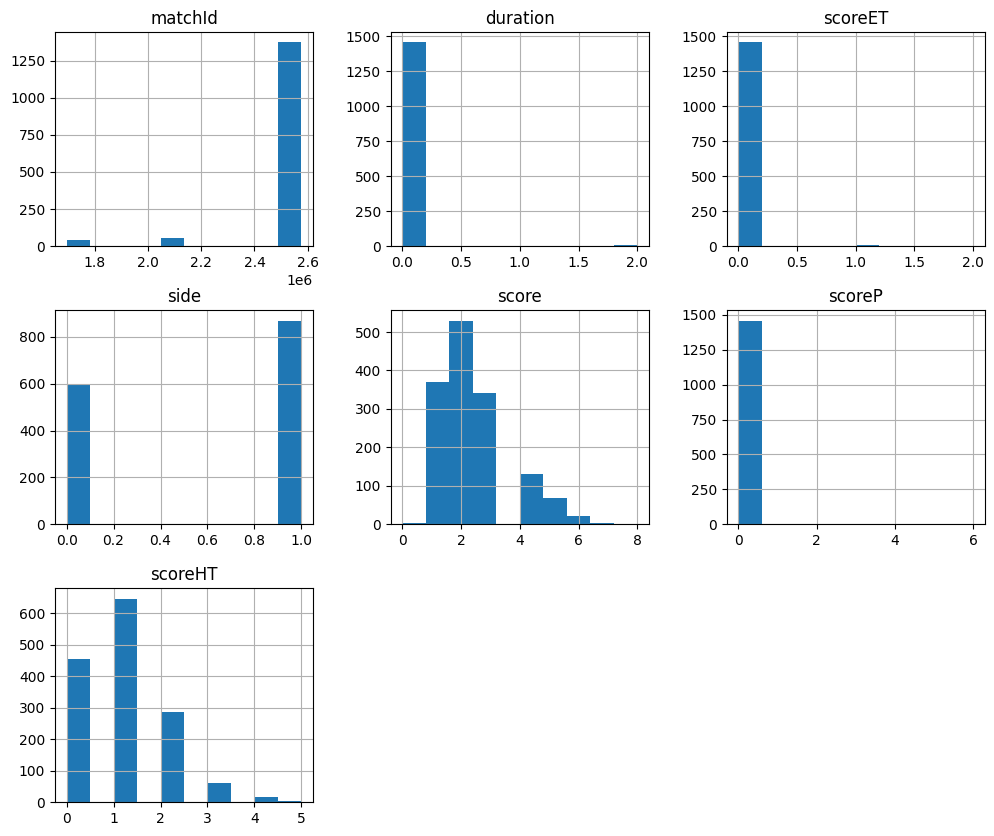

In [16]:
winners.hist(figsize=(12, 10), bins=10)
plt.show()

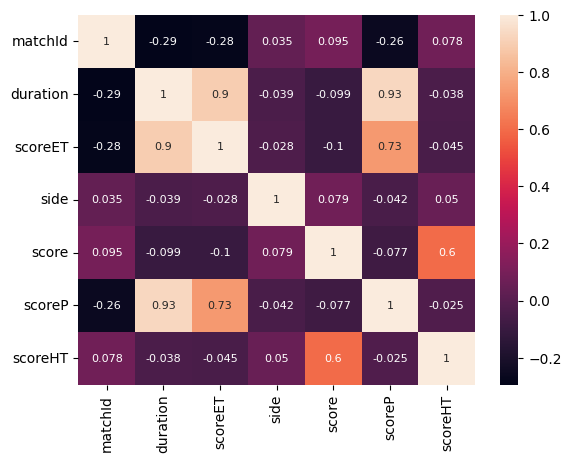

In [17]:
sns.heatmap(winners.corr(), annot=True, annot_kws={"fontsize":8})
plt.show()

In [18]:
winners

,matchId,duration,scoreET,side,score,scoreP,scoreHT
1,2058017,0,0,1,4,0,2
3,2058016,0,0,1,2,0,1
5,2058015,1,2,1,1,0,0
7,2058014,0,0,1,1,0,0
9,2058012,2,2,0,1,4,1
...,...,...,...,...,...,...,...
3871,1694402,0,0,1,1,0,0
3873,1694408,0,0,0,1,0,1
3876,1694396,0,0,1,2,0,1
3878,1694391,0,0,0,1,0,1


In [19]:
# merge the winners df with the everyPlayerDF
# allGames = dfAllMatches.merge(everyTeamDF, on='matchId', how='left')
winners2 = winners.merge(everyPlayerDF, on='matchId', how='left')
winners2.head()

,matchId,duration,scoreET,side,score,scoreP,scoreHT,formation,playerId,assists,ownGoals,redCards,goals,yellowCards
0,2058017,0,0,1,4,0,2,bench,69964,0,0,0,0,0
1,2058017,0,0,1,4,0,2,bench,69353,0,0,0,0,0
2,2058017,0,0,1,4,0,2,bench,212604,0,0,0,0,0
3,2058017,0,0,1,4,0,2,bench,69400,0,0,0,0,0
4,2058017,0,0,1,4,0,2,bench,230626,0,0,0,0,0


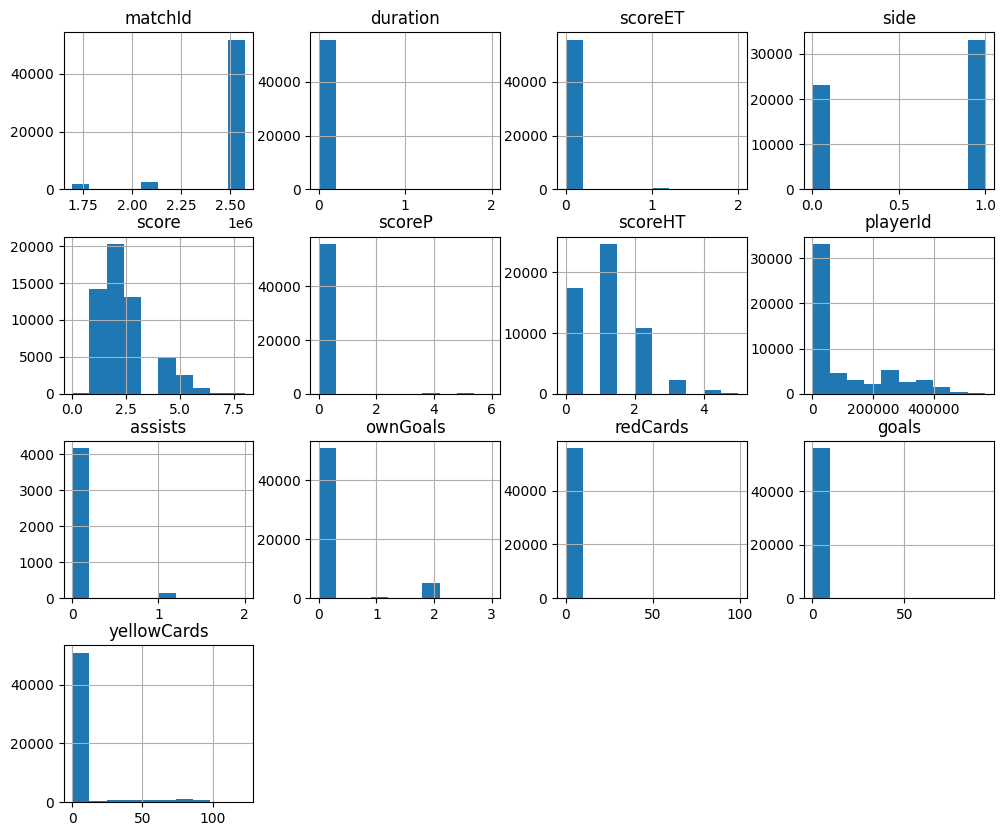

In [20]:
winners2.hist(figsize=(12, 10), bins=10)
plt.show()

Index(['matchId', 'duration', 'scoreET', 'side', 'score', 'scoreP', 'scoreHT',
       'formation', 'playerId', 'assists', 'ownGoals', 'redCards', 'goals',
       'yellowCards'],
      dtype='object')


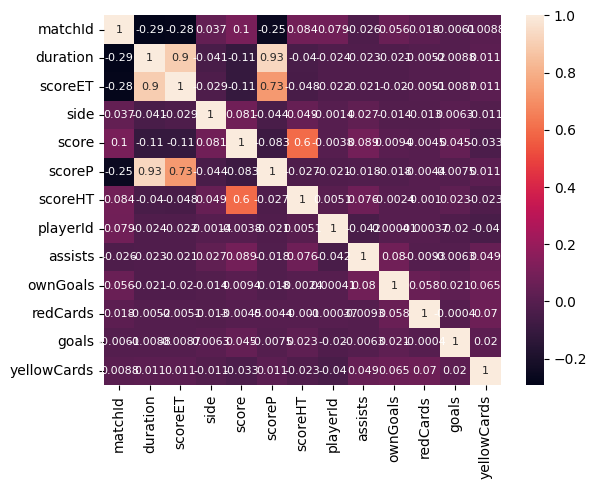

In [21]:
print(winners2.columns)
winners2.drop(['formation'], axis=1, inplace=True)
sns.heatmap(winners2.corr(), annot=True, annot_kws={"fontsize":8})
plt.show()

In [22]:
with open('../data/players.json') as json_file:
        data = json.load(json_file)

        df = pd.json_normalize(data)

df.drop(columns=['passportArea.id', 'passportArea.alpha3code', 'passportArea.alpha2code', 'role.code2', 'role.code3', 'birthArea.id', 'birthArea.alpha3code', 'birthArea.alpha2code'], inplace=True)
df.rename(columns={'passportArea.name':'passportArea', 'role.name':'role', 'birthArea.name':'birthArea', 'wyId':'playerId'}, inplace=True)
df

,weight,firstName,middleName,lastName,currentTeamId,birthDate,height,playerId,foot,shortName,currentNationalTeamId,passportArea,role,birthArea
0,78,Harun,,Tekin,4502,1989-06-17,187,32777,right,H. Tekin,4687,Turkey,Goalkeeper,Turkey
1,73,Malang,,Sarr,3775,1999-01-23,182,393228,left,M. Sarr,4423,Senegal,Defender,France
2,72,Over,,Mandanda,3772,1998-10-26,176,393230,,O. Mandanda,null,France,Goalkeeper,France
3,82,Alfred John Momar,,N'Diaye,683,1990-03-06,187,32793,right,A. N'Diaye,19314,Senegal,Midfielder,France
4,84,Ibrahima,,Konat\u00e9,2975,1999-05-25,192,393247,right,I. Konat\u00e9,null,France,Defender,France
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3598,72,Ali,,Ma\u00e2loul,16041,1990-01-01,175,120839,left,A. Ma\u00e2loul,null,Tunisia,Defender,Tunisia
3599,76,Carlos Alberto,,C\u00e1ceda Oyaguez,15591,1991-09-27,183,114736,right,C. C\u00e1ceda,null,Peru,Goalkeeper,Peru
3600,78,Miguel Gianpierre,,Araujo Blanco,12072,1994-10-24,179,114908,right,M. Araujo,null,Peru,Defender,Peru
3601,70,Ahmed Reda,,Tagnaouti,16183,1996-04-05,182,285583,right,A. Tagnaouti,null,Morocco,Goalkeeper,Morocco


In [23]:
winners2.merge(everyPlayerDF, on='matchId', how='left')

,matchId,duration,scoreET,side,score,scoreP,scoreHT,playerId_x,assists_x,ownGoals_x,redCards_x,goals_x,yellowCards_x,formation,playerId_y,assists_y,ownGoals_y,redCards_y,goals_y,yellowCards_y
0,2058017,0,0,1,4,0,2,69964,0,0,0,0,0,bench,69964,0,0,0,0,0
1,2058017,0,0,1,4,0,2,69964,0,0,0,0,0,bench,69353,0,0,0,0,0
2,2058017,0,0,1,4,0,2,69964,0,0,0,0,0,bench,212604,0,0,0,0,0
3,2058017,0,0,1,4,0,2,69964,0,0,0,0,0,bench,69400,0,0,0,0,0
4,2058017,0,0,1,4,0,2,69964,0,0,0,0,0,bench,230626,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2169122,1694390,0,0,1,2,0,0,25381,0,0,0,0,0,lineup,7858,0,0,0,0,0
2169123,1694390,0,0,1,2,0,0,25381,0,0,0,0,0,lineup,7855,0,0,0,0,0
2169124,1694390,0,0,1,2,0,0,25381,0,0,0,0,0,lineup,25437,0,0,0,0,0
2169125,1694390,0,0,1,2,0,0,25381,0,0,0,0,0,lineup,31528,1,0,0,0,0
